In [1]:
addprocs(4)

4-element Array{Int64,1}:
 2
 3
 4
 5

In [2]:
include("jl/all.jl");

In [3]:
pos = SharedArray(Float32, (3,1))
pos[1,:] = 501
pos[2,:] = 501
pos[3,:] = 501
m = SharedArray(Float32, 1)
m[:] = ones(Float32, 1)
N = 256
rho=SharedArray(Complex64,(N,N,N))
to_rho!(pos,m, rho, 1, 1000);

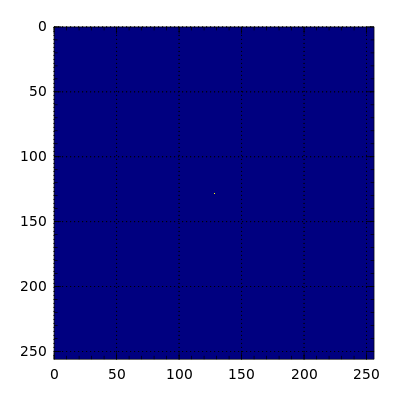

In [4]:
Winston.set_default_plot_size(400,400)
imagesc(real(rho[:,:,129])*100)
grid(true)

In [5]:
@time g = to_g_fft!(rho, 1000, 4.0);

  1.891334 seconds (677.19 k allocations: 31.581 MB, 0.42% gc time)


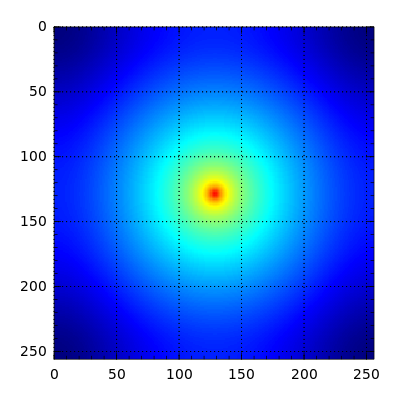

In [6]:
imagesc(log(abs(g[:,:,129])))
grid(true)

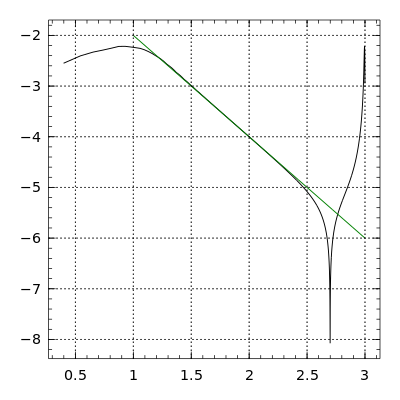

In [7]:
pos = SharedArray(Float32, (3,1000))
pos[1,:] = ones(1000)*501
pos[2,:] = linspace(503.5,1500,1000)
pos[3,:] = ones(1000)*501
v = SharedArray(eltype(g), 1000)
v[:] = 0

hold(false)
plot(log10(pos[2,:]-501), log10(abs(real(from_cic_dim2!(v,pos,g,2,1,1000)))),"k-")
#plot(log10(pos[2,:]-501), log10(0.0019+abs(real(from_cic!(v,pos,g,1,1000)))),"k-")
hold(true)

plot(log10(10:999), -2log10(10:999),"g")
#plot(log10(10:999), -log10(10:999),"g")
hold(false)
grid(true)
#xlim(1,3)
#ylim(-3,-1)

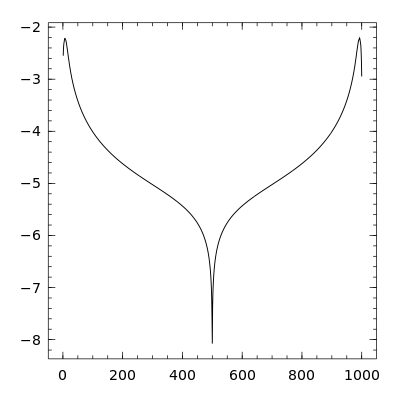

In [8]:
plot(log10(abs(real(from_cic_dim2!(v,pos,g,2,1,1000)))),"k-")

In [9]:
from_cic_dim2!(v,pos,g,2,1,1000)

1000-element SharedArray{Complex{Float32},1}:
 -0.00282265+1.04107e-10im
  -0.00394889+2.2331e-11im
 -0.00468195-1.58792e-11im
 -0.00514199-2.38417e-11im
 -0.00560203-3.18042e-11im
 -0.00606208-3.97667e-11im
 -0.00608918-2.79943e-11im
 -0.00590701-6.68209e-12im
 -0.00572485+1.46289e-11im
 -0.00554269+3.59398e-11im
 -0.00519966+3.52702e-11im
 -0.00480528+2.75867e-11im
 -0.00441092+1.99038e-11im
                     ⋮    
  0.00539835+1.39978e-10im
  0.00563446+8.56588e-11im
  0.00581663+1.53401e-11im
  0.00599878-5.49724e-11im
  0.00618095-1.25291e-10im
  0.00583033-1.22762e-10im
  0.00537025-1.05273e-10im
  0.00491022-8.77854e-11im
  0.00445015-7.02964e-11im
   0.00338154+1.9359e-11im
  0.00225523+1.15852e-10im
  0.00112905+2.12334e-10im